In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
import zipfile

# Open the first Excel file from the ZIP archive
zip_file_path = r"C:\Users\Swanand Potnis\Desktop\Complaints.zip"
excel_file_name = "Consumer_Complaints.xlsx"  # Adjust this to the actual file name
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(excel_file_name) as excel_file:
        # Load the consumer complaints data from the opened Excel file
        complaints_data = pd.read_excel(excel_file)

# Display the first few rows of the data
print(complaints_data.head())

   Complaint ID Submitted via Date submitted Date received State  \
0       4848023      Referral     2021-10-24    2021-10-27    NY   
1       3621464           Web     2020-04-24    2020-04-24    FL   
2       5818349           Web     2022-07-27    2022-07-27    CA   
3       7233015      Referral     2023-07-10    2023-07-11    CA   
4       5820224      Referral     2022-07-27    2022-07-28    VA   

                                             Product  \
0                                           Mortgage   
1  Money transfer, virtual currency, or money ser...   
2  Credit reporting, credit repair services, or o...   
3                        Credit card or prepaid card   
4                        Credit card or prepaid card   

                                  Sub-product  \
0                  Conventional home mortgage   
1                   Refund anticipation check   
2                            Credit reporting   
3                General-purpose prepaid card   
4  Genera

In [7]:
# Display basic information about the DataFrame
print(complaints_data.info())

# Display summary statistics for numerical columns
print(complaints_data.describe())

# Display the first few rows of the DataFrame
print(complaints_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     51658 non-null  object        
 9   Company public response       60341 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

In [8]:
# Check for missing values in the DataFrame
missing_values = complaints_data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         7
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64


In [10]:
# Fill missing values in Sub-product and Company public response with mode
complaints_data['Sub-product'] = complaints_data['Sub-product'].fillna(complaints_data['Sub-product'].mode()[0])
complaints_data['Company public response'] = complaints_data['Company public response'].fillna(complaints_data['Company public response'].mode()[0])

# Fill missing values in Timely response? with mode
complaints_data['Timely response?'] = complaints_data['Timely response?'].fillna(complaints_data['Timely response?'].mode()[0])

# Create a new category 'Unknown' for missing values in Sub-issue
complaints_data['Sub-issue'] = complaints_data['Sub-issue'].fillna('Unknown')


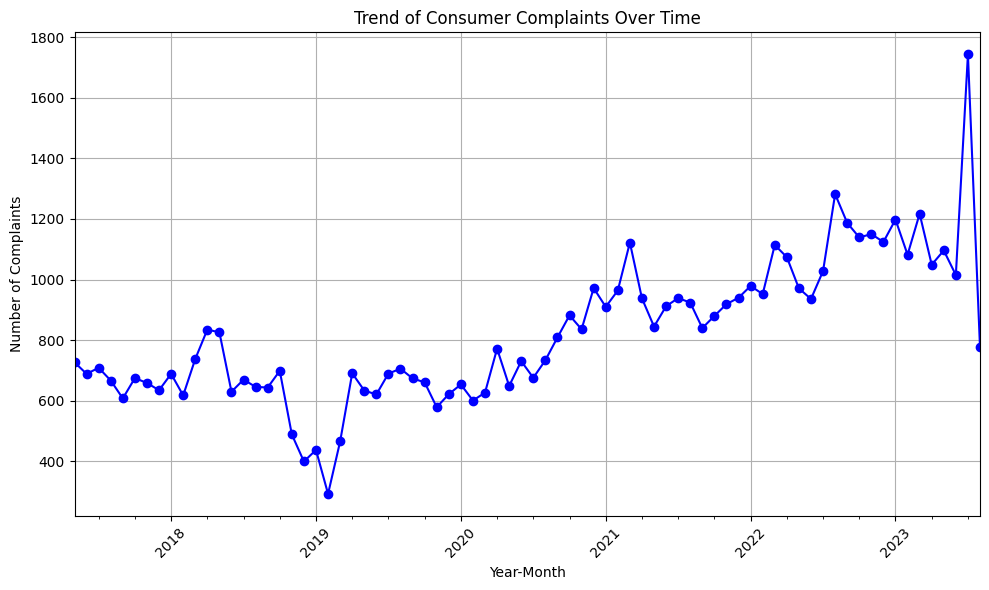

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date received' column contains the date information
# Convert 'Date received' column to datetime datatype
complaints_data['Date received'] = pd.to_datetime(complaints_data['Date received'])

# Extract month and year from 'Date received' column
complaints_data['YearMonth'] = complaints_data['Date received'].dt.to_period('M')

# Group by YearMonth and count the number of complaints
monthly_complaints = complaints_data.groupby('YearMonth').size()

# Plot the trend of complaints over time
plt.figure(figsize=(10, 6))
monthly_complaints.plot(kind='line', marker='o', color='b')
plt.title('Trend of Consumer Complaints Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

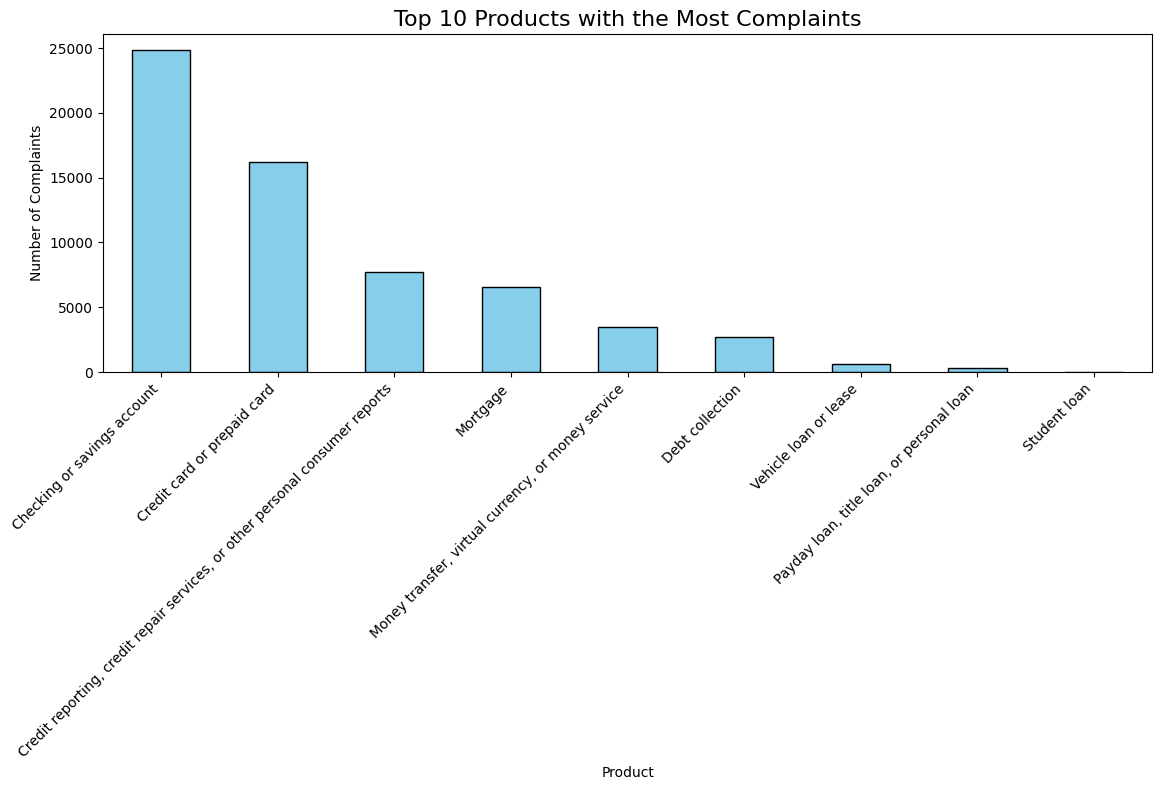

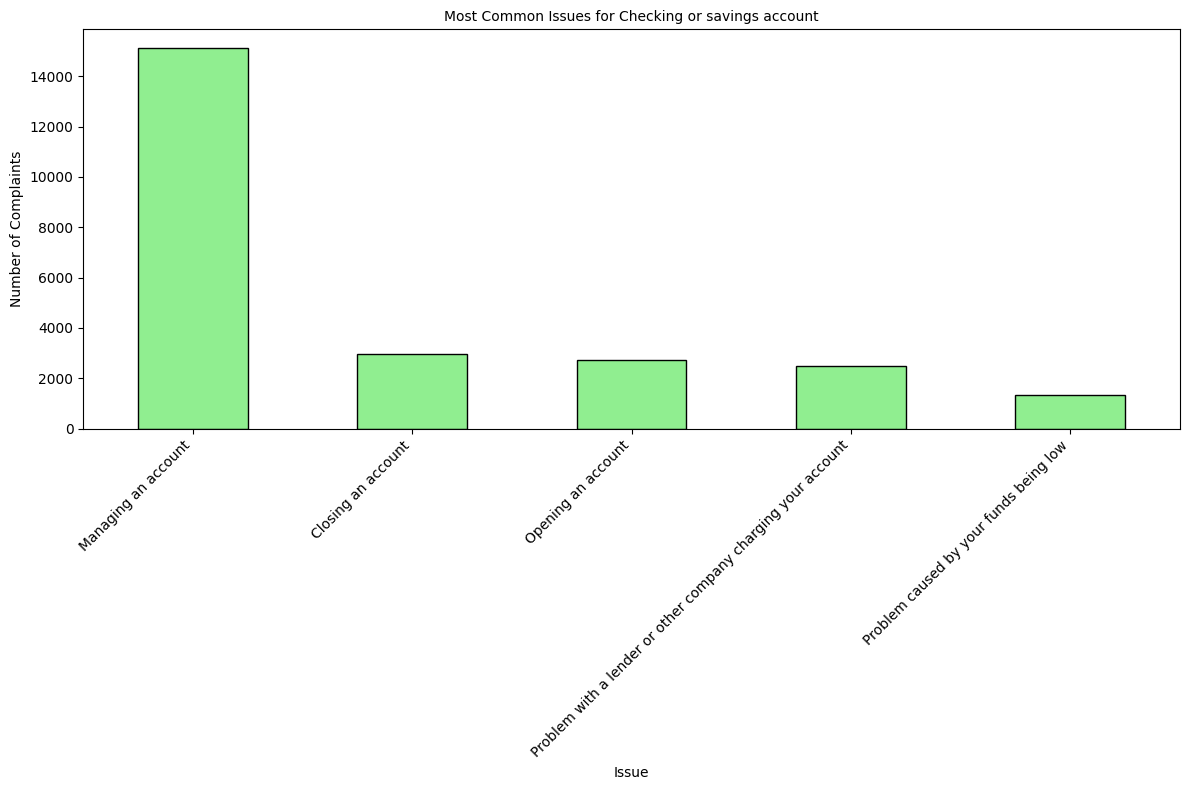

In [22]:
# Plot the top N products with the most complaints
plt.figure(figsize=(12, 8))  # Adjust figure size
product_counts.head(N).plot(kind='bar', color='skyblue', edgecolor='black', fontsize=10)  # Increase fontsize
plt.title('Top {} Products with the Most Complaints'.format(N), fontsize=16)  # Increase title fontsize
plt.xlabel('Product', fontsize=10)  # Increase x-axis label fontsize
plt.ylabel('Number of Complaints', fontsize=10)  # Increase y-axis label fontsize
plt.xticks(rotation=45, ha='right', fontsize=10)  # Increase x-ticks fontsize
plt.tight_layout()
plt.show()

# Plot the most common issues for the top product
plt.figure(figsize=(12, 8))  # Adjust figure size
top_product_issues.head(top_N_issues).plot(kind='bar', color='lightgreen', edgecolor='black', fontsize=10)  # Increase fontsize
plt.title('Most Common Issues for {}'.format(top_product), fontsize=10)  # Increase title fontsize
plt.xlabel('Issue', fontsize=10)  # Increase x-axis label fontsize
plt.ylabel('Number of Complaints', fontsize=10)  # Increase y-axis label fontsize
plt.xticks(rotation=45, ha='right', fontsize=10)  # Increase x-ticks fontsize
plt.tight_layout()
plt.show()

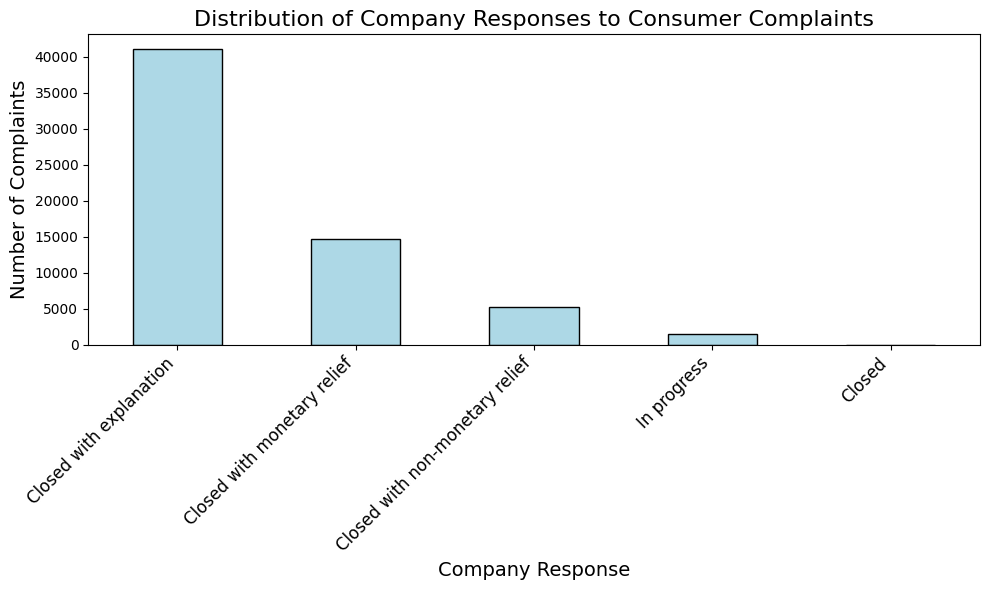

In [24]:
# Count the number of complaints for each company response
response_counts = complaints_data['Company response to consumer'].value_counts()

# Plot the distribution of company responses
plt.figure(figsize=(10, 6))
response_counts.plot(kind='bar', color='lightblue', edgecolor='black' )
plt.title('Distribution of Company Responses to Consumer Complaints', fontsize=16)
plt.xlabel('Company Response', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

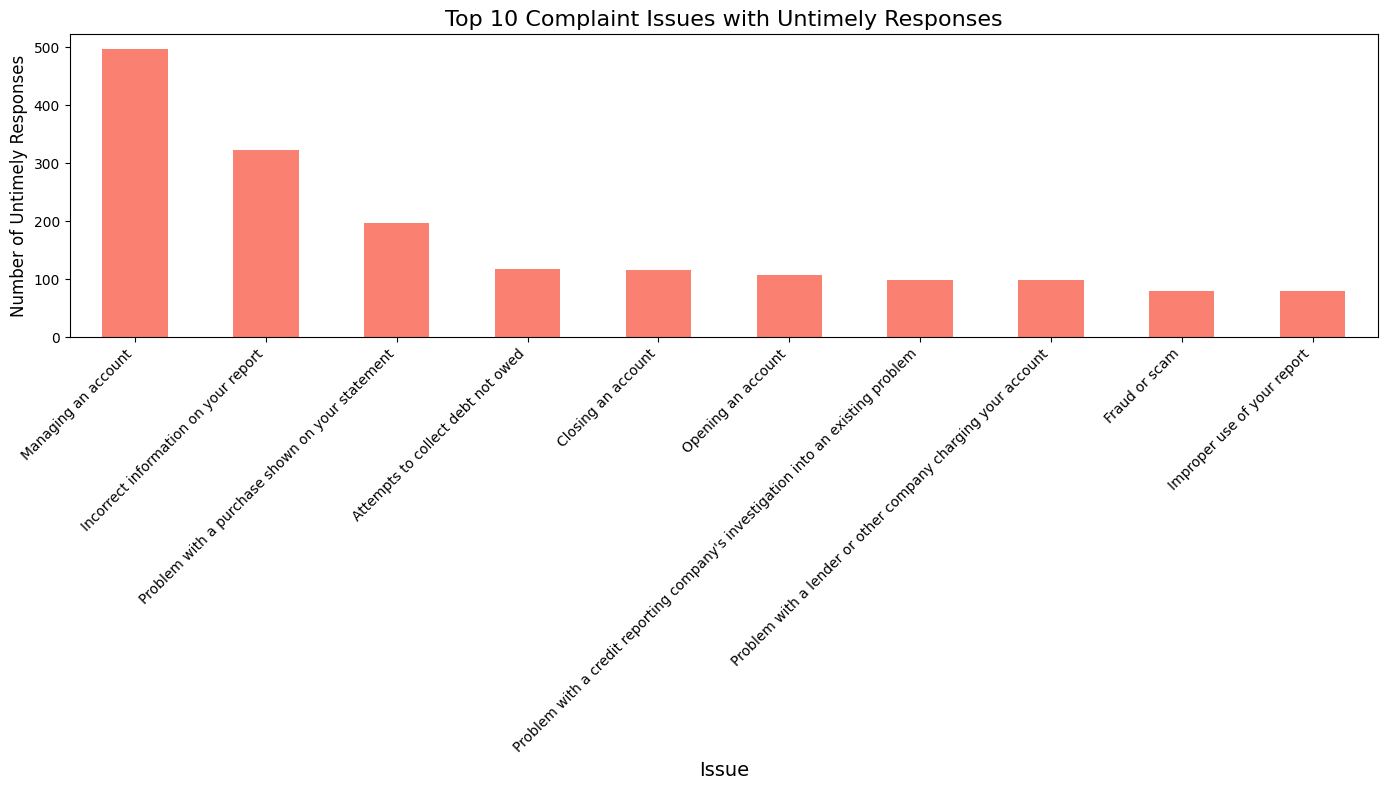

In [27]:
# Filter complaints with untimely responses
untimely_complaints = complaints_data[complaints_data['Timely response?'] == 'No']

# Count the number of untimely responses for each issue
untimely_response_counts = untimely_complaints['Issue'].value_counts()

# Plot the distribution of issues among untimely responses
plt.figure(figsize=(14, 8))
untimely_response_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Complaint Issues with Untimely Responses', fontsize=16)
plt.xlabel('Issue', fontsize=14)
plt.ylabel('Number of Untimely Responses', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


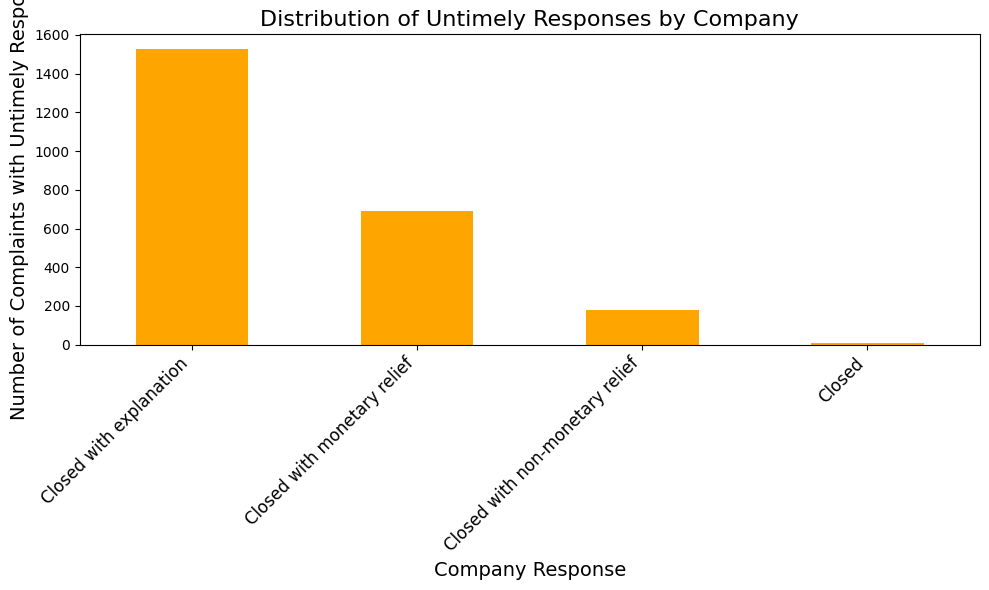

C:\Users\Swanand Potnis\AppData\Local\Temp\ipykernel_25532\2436829881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  untimely_complaints['YearMonth'] = untimely_complaints['Date received'].dt.to_period('M')


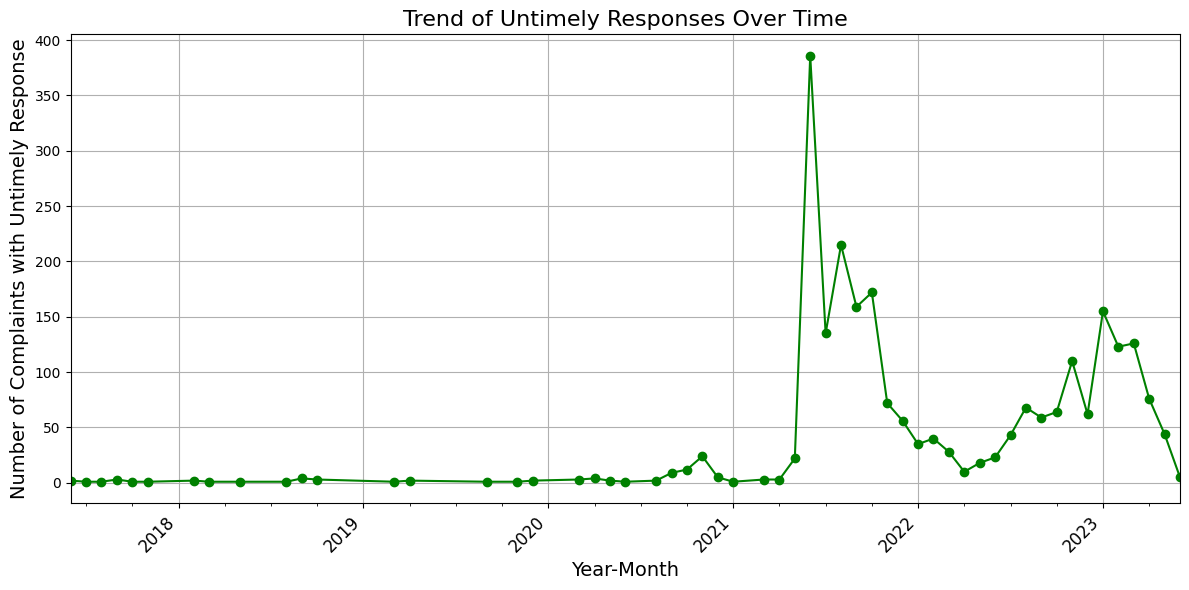

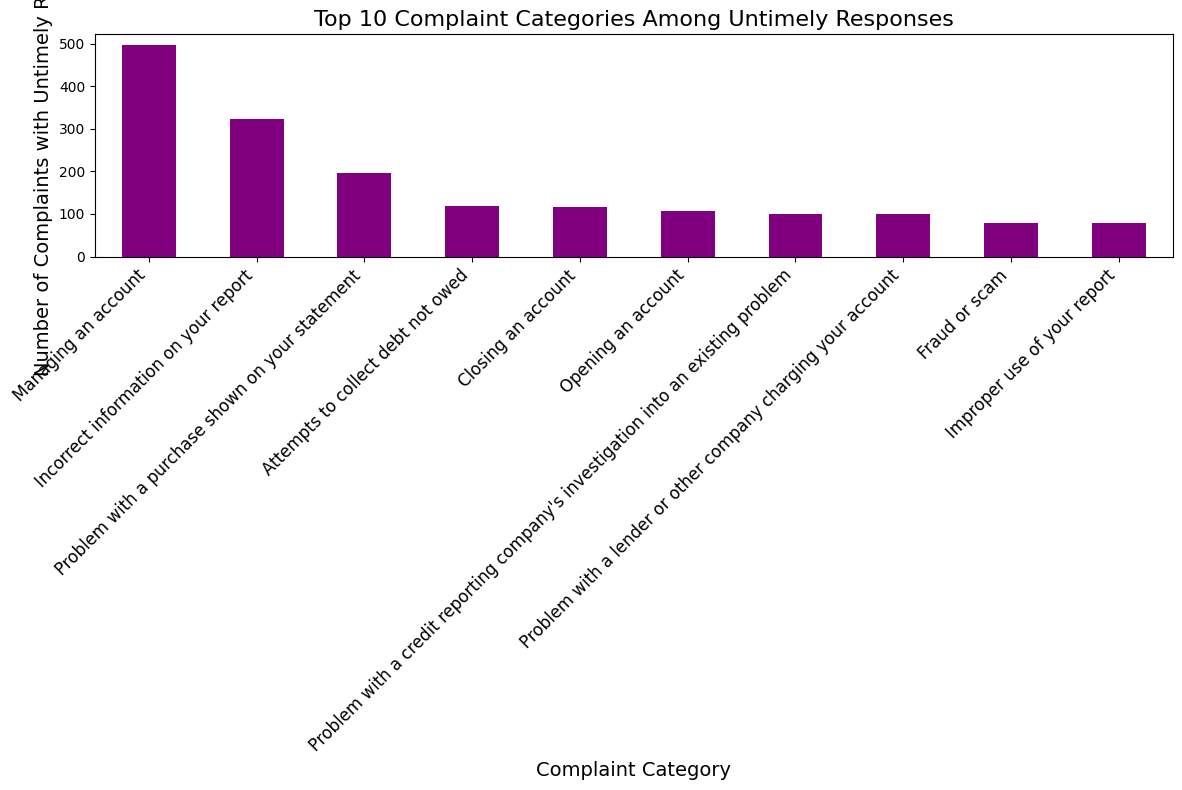

<module 'matplotlib.pyplot' from 'C:\\Users\\Swanand Potnis\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

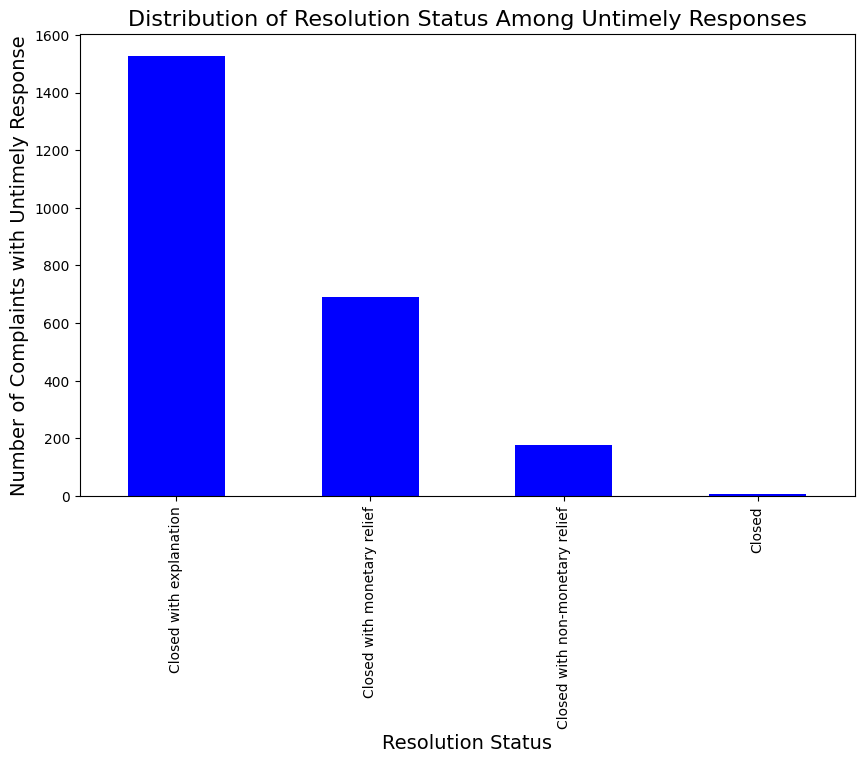

In [35]:
# 1. Filter complaints with untimely responses
untimely_complaints = complaints_data[complaints_data['Timely response?'] == 'No']

# 2. Explore company performance
company_response_counts = untimely_complaints['Company response to consumer'].value_counts()

# Plot the distribution of untimely responses by company
plt.figure(figsize=(10, 6))
company_response_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Untimely Responses by Company', fontsize=16)
plt.xlabel('Company Response', fontsize=14)
plt.ylabel('Number of Complaints with Untimely Response', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Investigate time trends
untimely_complaints['YearMonth'] = untimely_complaints['Date received'].dt.to_period('M')
time_trend_counts = untimely_complaints['YearMonth'].value_counts().sort_index()

# Plot the trend of untimely responses over time
plt.figure(figsize=(12, 6))
time_trend_counts.plot(kind='line', marker='o', color='green')
plt.title('Trend of Untimely Responses Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Complaints with Untimely Response', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Analyze complaint categories
complaint_category_counts = untimely_complaints['Issue'].value_counts()

# Plot the distribution of complaint categories among untimely responses
plt.figure(figsize=(12, 8))
complaint_category_counts.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Complaint Categories Among Untimely Responses', fontsize=16)
plt.xlabel('Complaint Category', fontsize=14)
plt.ylabel('Number of Complaints with Untimely Response', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Examine resolution status
resolution_status_counts = untimely_complaints['Company response to consumer'].value_counts()

# Plot the distribution of resolution status among untimely responses
plt.figure(figsize=(10, 6))
resolution_status_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Resolution Status Among Untimely Responses', fontsize=16)
plt.xlabel('Resolution Status', fontsize=14)
plt.ylabel('Number of Complaints with Untimely Response', fontsize=14)
plt